In [2]:
import pandas as pd
df = pd.read_csv('nc.csv')
df.head()


,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


In [3]:
df.describe()

,fage,mage,weeks,visits,gained,weight
count,829.000000,1000.000000,998.000000,991.000000,973.000000,1000.00000
mean,30.255730,27.000000,38.334669,12.104945,30.325797,7.10100
std,6.763766,6.213583,2.931553,3.954934,14.241297,1.50886
min,14.000000,13.000000,20.000000,0.000000,0.000000,1.00000
25%,25.000000,22.000000,37.000000,10.000000,20.000000,6.38000
50%,30.000000,27.000000,39.000000,12.000000,30.000000,7.31000
75%,35.000000,32.000000,40.000000,15.000000,38.000000,8.06000
max,55.000000,50.000000,45.000000,30.000000,85.000000,11.75000


In [27]:
#df['weight'].groupby('habit').mean
#df.columns
df_weight_smoker = df[df['habit']=='smoker']['weight']
df_weight_nonsmoker = df[df['habit']=='nonsmoker']['weight']
import scipy.stats as stats
sampl1 = df_weight_smoker.sample(70)
sampl2 = df_weight_nonsmoker.sample(70)


In [20]:
#Testing if the average weights of babies born to smoking and non-smoking mothers are different.
#null hypothesis : weights of babies born to smoking and non-smoking mothers are not different.
stats.ttest_ind(sampl1,sampl2)

Ttest_indResult(statistic=-1.4478402365690808, pvalue=0.14992980789556112)

In [21]:
#null hypothesis rejected

In [22]:
from scipy.stats import f_oneway
f_oneway(sampl1,sampl2)

F_onewayResult(statistic=2.0962413506284197, pvalue=0.14992980789556012)

In [30]:
sampl3 = df_weight_nonsmoker.sample(70)
sampl4 = df_weight_smoker.sample(70)
f_oneway(sampl1,sampl2,sampl3,sampl4)

F_onewayResult(statistic=1.2371372201205006, pvalue=0.29653855456800443)

In [36]:
df.groupby('habit')['weight'].count()


habit
nonsmoker    7.144273
smoker       6.828730
Name: weight, dtype: float64

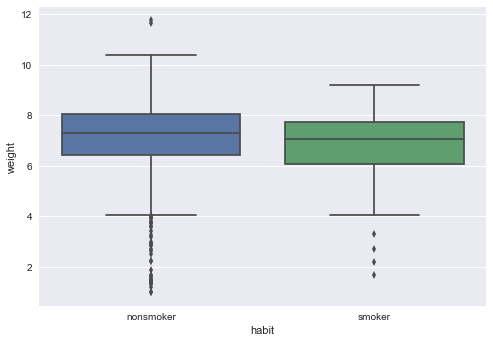

In [46]:
import seaborn as sns
boxplot = sns.boxplot(y='weight',x='habit',data=df)

plt.show()
